In [2]:
# http://www.jalobe.com:8080/software/

tsoutliers <- function(x,plot=FALSE)
{
    x <- as.ts(x)
    if(frequency(x)>1)
        resid <- stl(x,s.window="periodic",robust=TRUE)$time.series[,3]
    else
    {
        tt <- 1:length(x)
        resid <- residuals(loess(x ~ tt))
    }
    resid.q <- quantile(resid,prob=c(0.25,0.75))
    iqr <- diff(resid.q)
    limits <- resid.q + 1.5*iqr*c(-1,1)
    score <- abs(pmin((resid-limits[1])/iqr,0) + pmax((resid - limits[2])/iqr,0))
    if(plot)
    {
        plot(x)
        x2 <- ts(rep(NA,length(x)))
        x2[score>0] <- x[score>0]
        tsp(x2) <- tsp(x)
        points(x2,pch=19,col="red")
        return(invisible(score))
    }
    else
        return(score)
}

1           2           3           4           5           6 
0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 
          7           8           9          10          11          12 
0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 
         13          14          15          16          17          18 
0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 
         19          20          21          22          23          24 
0.000000000 0.000000000 0.002232067 0.000000000 0.000000000 0.000000000 
         25          26          27          28          29          30 
0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 
         31          32          33          34          35          36 
0.052772553 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 
         37          38          39          40          41          42 
0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000

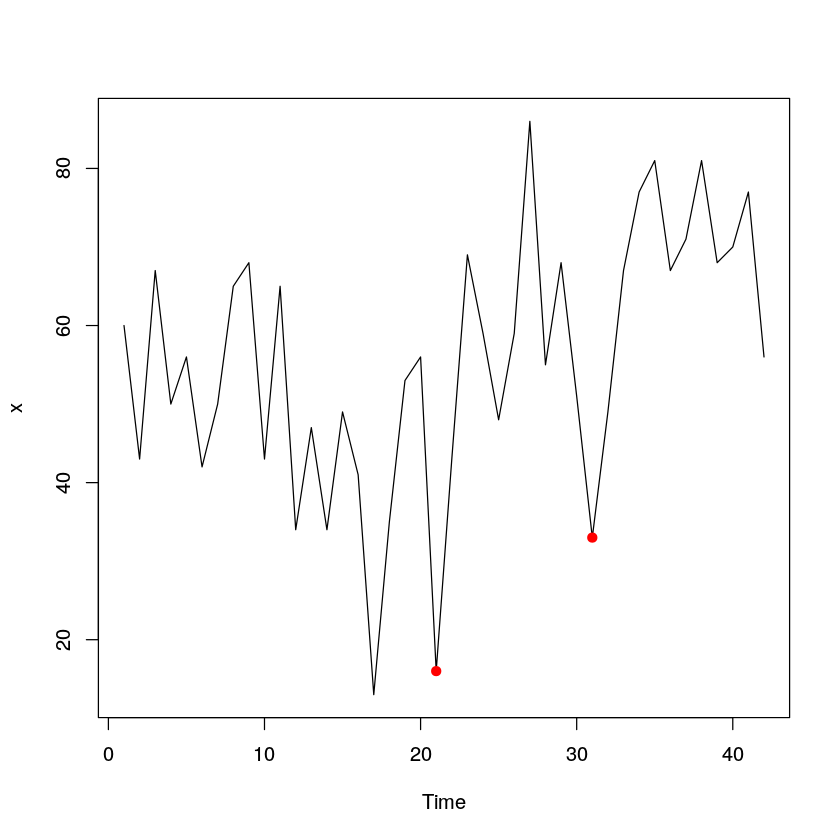

In [5]:
kings <- scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)
scores <- tsoutliers( kings, plot=TRUE)
scores